In [1]:
%matplotlib notebook
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
#from matplotlib import animation
#Path to the scripts shared troughout phases
parent_path=os.path.abspath('..')
path_common =  '/'.join(parent_path.split('/')[:-1])
save_path = os.path.join(parent_path,'Moving_Rigidbody_Network_sizes')
if(not os.path.exists(save_path)):
    os.makedirs(save_path)

basis_path = os.path.join(parent_path,'Moving_Rigidbody_Network_sizes','no_gravity_fixed_box_fixed_not_in_error')
layer_2_basis = os.path.join(basis_path,'LayerSize=2')
layer_3_basis = os.path.join(basis_path,'LayerSize=3')
layer_4_basis = os.path.join(basis_path,'LayerSize=4')


In [2]:
layer_2_tr = []
layer_2_ge_pred = []
layer_2_ge_true = []
layer_2_te_pred = []
layer_2_te_true = []
for folder in os.listdir(layer_2_basis):
    path_to_saves = os.path.join(layer_2_basis,folder,'Saves')
    layer_2_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))
    layer_2_ge_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_ge.npy')))
    layer_2_ge_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_ge.npy')))
    layer_2_te_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_te.npy')))
    layer_2_te_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_te.npy')))


layer_2_tr = np.array(layer_2_tr)
layer_2_te_pred_f = np.array(layer_2_te_pred)
layer_2_te_true_f = np.array(layer_2_te_true)
layer_2_ge_pred_f = np.array(layer_2_ge_pred)
layer_2_ge_true_f = np.array(layer_2_ge_true)

In [3]:
layer_3_tr = []
layer_3_ge_pred = []
layer_3_ge_true = []
layer_3_te_pred = []
layer_3_te_true = []
for folder in os.listdir(layer_3_basis):
    path_to_saves = os.path.join(layer_3_basis,folder,'Saves')
    layer_3_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))
    layer_3_ge_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_ge.npy')))
    layer_3_ge_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_ge.npy')))
    layer_3_te_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_te.npy')))
    layer_3_te_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_te.npy')))


layer_3_tr = np.array(layer_3_tr)
layer_3_te_pred_f = np.array(layer_3_te_pred)
layer_3_te_true_f = np.array(layer_3_te_true)
layer_3_ge_pred_f = np.array(layer_3_ge_pred)
layer_3_ge_true_f = np.array(layer_3_ge_true)

In [4]:
layer_4_tr = []
layer_4_ge_pred = []
layer_4_ge_true = []
layer_4_te_pred = []
layer_4_te_true = []
for folder in os.listdir(layer_4_basis):
    path_to_saves = os.path.join(layer_4_basis,folder,'Saves')
    layer_4_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))
    layer_4_ge_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_ge.npy')))
    layer_4_ge_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_ge.npy')))
    layer_4_te_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_te.npy')))
    layer_4_te_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_te.npy')))


layer_4_tr = np.array(layer_4_tr)
layer_4_te_pred_f = np.array(layer_4_te_pred)
layer_4_te_true_f = np.array(layer_4_te_true)
layer_4_ge_pred_f = np.array(layer_4_ge_pred)
layer_4_ge_true_f = np.array(layer_4_ge_true)

In [5]:
layer_2_te_pred = layer_2_te_pred_f[...,2:4]
layer_2_te_true = layer_2_te_true_f[...,2:4]
layer_2_ge_pred = layer_2_ge_pred_f[...,2:4]
layer_2_ge_true = layer_2_ge_true_f[...,2:4]

layer_3_te_pred = layer_3_te_pred_f[...,2:4]
layer_3_te_true = layer_3_te_true_f[...,2:4]
layer_3_ge_pred = layer_3_ge_pred_f[...,2:4]
layer_3_ge_true = layer_3_ge_true_f[...,2:4]

layer_4_te_pred = layer_4_te_pred_f[...,2:4]
layer_4_te_true = layer_4_te_true_f[...,2:4]
layer_4_ge_pred = layer_4_ge_pred_f[...,2:4]
layer_4_ge_true = layer_4_ge_true_f[...,2:4]

def calculateError(true,pred):
    error = np.square(true - pred)
    error = np.sum(error,axis=-1)
    error = np.mean(error,axis = -1)
    error = np.mean(error,axis = 1)
    mean = np.mean(error,axis = 0)
    std = np.std(error,axis = 0)
    return mean, std
    

<IPython.core.display.Javascript object>


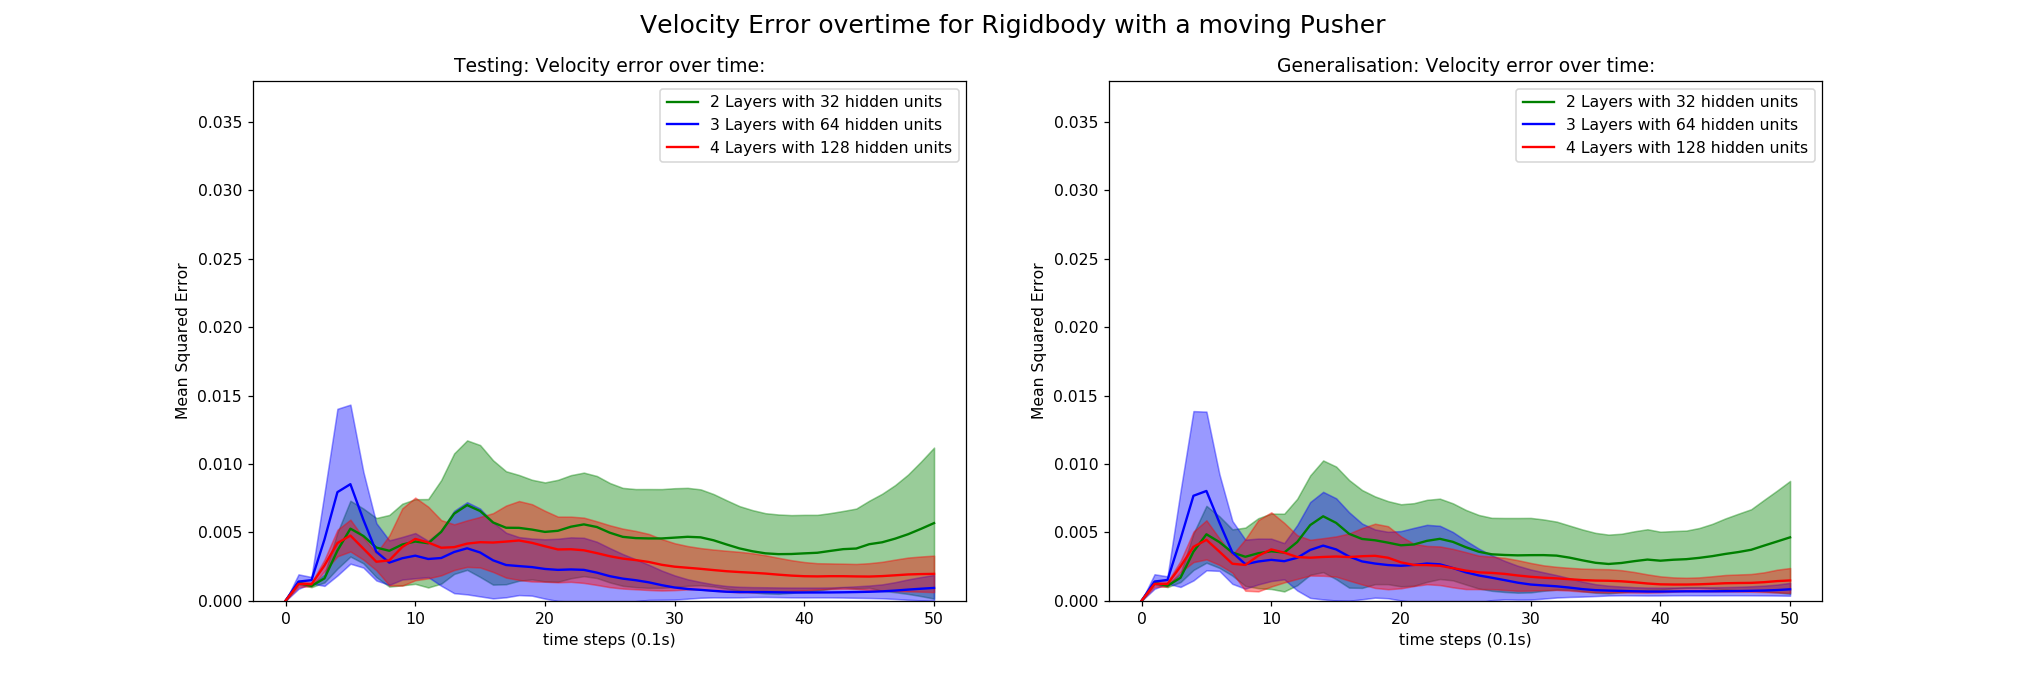

In [6]:
y0,e0 = calculateError(layer_2_te_true, layer_2_te_pred)
y1,e1 = calculateError(layer_3_te_true, layer_3_te_pred)
y2,e2 = calculateError(layer_4_te_true, layer_4_te_pred)
x = list(range(len(y1)))

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y0, "g",label = "2 Layers with 32 hidden units")
plt.fill_between(x, y0-e0, y0+e0, color = "g",alpha=0.4)
ax.plot(x, y1, "b",label = "3 Layers with 64 hidden units")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)
ax.plot(x, y2, "r",label = "4 Layers with 128 hidden units")
plt.fill_between(x, y2-e2, y2+e2, color = "r",alpha=0.4)

ax.legend()
ax.set_ylim(0.0,0.038)
ax.set_title("Testing: Velocity error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("Mean Squared Error")

y0,e0 = calculateError(layer_2_ge_true, layer_2_ge_pred)
y1,e1 = calculateError(layer_3_ge_true, layer_3_ge_pred)
y2,e2 = calculateError(layer_4_ge_true, layer_4_ge_pred)
x = list(range(len(y1)))

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y0, "g",label = "2 Layers with 32 hidden units")
plt.fill_between(x, y0-e0, y0+e0, color = "g",alpha=0.4)
ax.plot(x, y1, "b",label = "3 Layers with 64 hidden units")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)
ax.plot(x, y2, "r",label = "4 Layers with 128 hidden units")
plt.fill_between(x, y2-e2, y2+e2, color ="r",alpha=0.4)

ax.legend()
ax.set_ylim(0.0,0.038)
ax.set_title("Generalisation: Velocity error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("Mean Squared Error")

fig.suptitle("Velocity Error overtime for Rigidbody with a moving Pusher", fontsize=16)



plt.show()
#Save figure                  
fig.savefig(os.path.join(save_path,'NetworkSizesComparison2vs3vs4_velocity.pdf'))

In [7]:
layer_2_te_pred = layer_2_te_pred_f[...,0:2]
layer_2_te_true = layer_2_te_true_f[...,0:2]
layer_2_ge_pred = layer_2_ge_pred_f[...,0:2]
layer_2_ge_true = layer_2_ge_true_f[...,0:2]

layer_3_te_pred = layer_3_te_pred_f[...,0:2]
layer_3_te_true = layer_3_te_true_f[...,0:2]
layer_3_ge_pred = layer_3_ge_pred_f[...,0:2]
layer_3_ge_true = layer_3_ge_true_f[...,0:2]

layer_4_te_pred = layer_4_te_pred_f[...,0:2]
layer_4_te_true = layer_4_te_true_f[...,0:2]
layer_4_ge_pred = layer_4_ge_pred_f[...,0:2]
layer_4_ge_true = layer_4_ge_true_f[...,0:2]

<IPython.core.display.Javascript object>


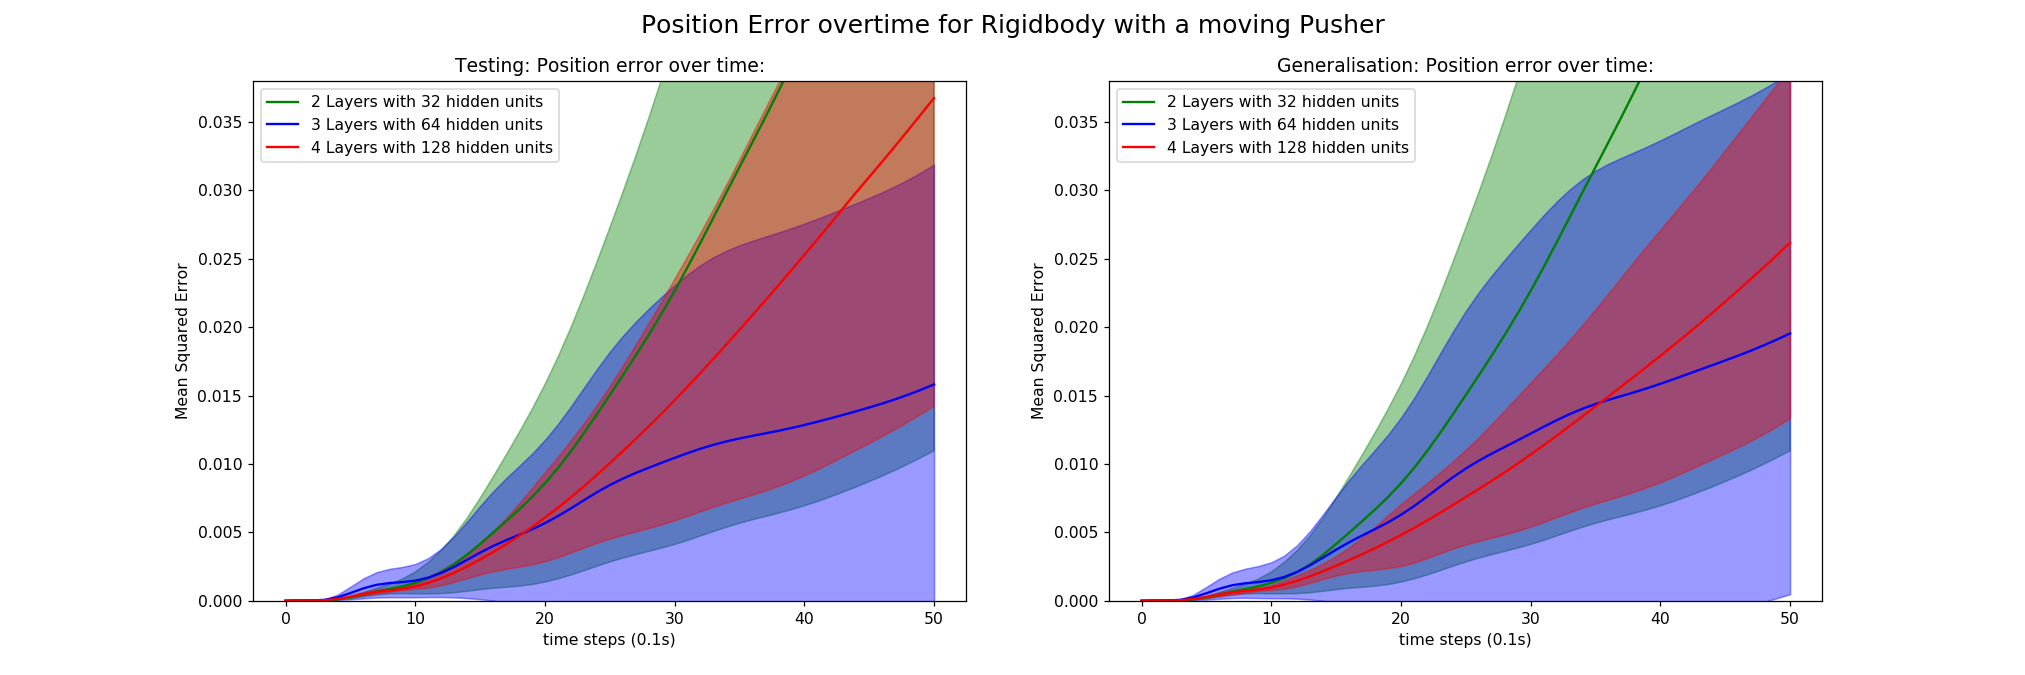

In [8]:
y0,e0 = calculateError(layer_2_te_true, layer_2_te_pred)
y1,e1 = calculateError(layer_3_te_true, layer_3_te_pred)
y2,e2 = calculateError(layer_4_te_true, layer_4_te_pred)
x = list(range(len(y1)))

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y0, "g",label = "2 Layers with 32 hidden units")
plt.fill_between(x, y0-e0, y0+e0, color = "g",alpha=0.4)
ax.plot(x, y1, "b",label = "3 Layers with 64 hidden units")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)
ax.plot(x, y2, "r",label = "4 Layers with 128 hidden units")
plt.fill_between(x, y2-e2, y2+e2, color = "r",alpha=0.4)

ax.legend()
ax.set_ylim(0.0,0.038)
ax.set_title("Testing: Position error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("Mean Squared Error")


y1,e1 = calculateError(layer_3_ge_true, layer_3_ge_pred)
y2,e2 = calculateError(layer_4_ge_true, layer_4_ge_pred)
x = list(range(len(y1)))

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y0, "g",label = "2 Layers with 32 hidden units")
plt.fill_between(x, y0-e0, y0+e0, color = "g",alpha=0.4)
ax.plot(x, y1, "b",label = "3 Layers with 64 hidden units")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)
ax.plot(x, y2, "r",label = "4 Layers with 128 hidden units")
plt.fill_between(x, y2-e2, y2+e2, color ="r",alpha=0.4)

ax.legend()
ax.set_ylim(0.0,0.038)
ax.set_title("Generalisation: Position error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("Mean Squared Error")

fig.suptitle("Position Error overtime for Rigidbody with a moving Pusher", fontsize=16)



plt.show()
#Save figure                  
fig.savefig(os.path.join(save_path,'NetworkSizesComparison2vs3vs4_Position.pdf'))